# Part I: Sparse coding of natural images 

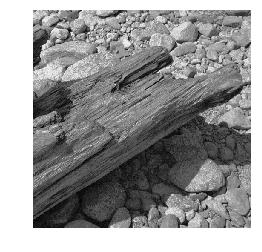

In [1]:
import scipy.io
data = scipy.io.loadmat('/project/cmsc25025/sparsecoding/IMAGES_RAW.mat')
images = data['IMAGESr']
# images is a 3D array of size [512,512,10]
# where the 10 images are of size 512 x 512
import matplotlib.pyplot as plt
plt.imshow(images[:,:,0], cmap='gray')
plt.axis('off')
plt.show()

(256, 100)


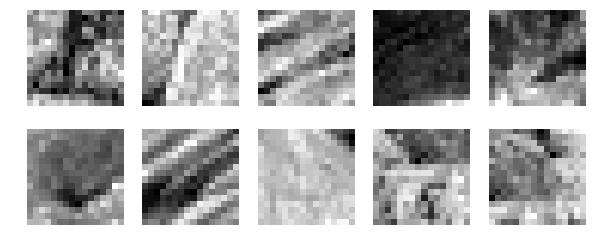

In [2]:
import random
import numpy as np
def sample_random_square_patches(image, num, width):
    #num is the number of patches we sample
    #width is the size of pathces we sample
    patches = np.zeros([width * width,num])
    for k in range(num):
        i, j = random.sample(range(image.shape[0]-width),2)
        patches[:,k] = np.ravel(image[i:i+width,j:j+width])
    return patches
# Width for sampled image patch
width = 16
# Mini-batch size
num = 100
patches = sample_random_square_patches(images[:,:,0], num, width)
print patches.shape
def display_images(patches, nrows, ncols):
    #Display images in nrows and ncols
    plt.figure(figsize = (ncols*2, nrows*2))
    for k in range(nrows * ncols):
        plt.subplot(nrows, ncols, k+1)
        plt.imshow(patches[k].reshape(width, width), cmap='gray')
        plt.axis('off')
    plt.show()
    
#Illustration of randomly selected patches
display_images(patches.T, 2, 5)

In [3]:
from sklearn import linear_model
#build the model for lasso regression for beta
clf = linear_model.Lasso(alpha=0.007, copy_X=True, fit_intercept=False, max_iter=1500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=True)


In [4]:
def norm_X(X):
    #Normalize X by column 
    nrow, ncol = X.shape
    for j in range(ncol):
        X[:, j] /= np.linalg.norm(X[:, j])
        
#patches = sample_random_square_patches(images[:,:,0], 128, 16)
#X = (np.random.random((n, 80)) - 0.5) * 2
#norm_X(X)
#clf.fit(X, patches)  
#print np.count_nonzero(clf.coef_) / float(clf.coef_.size)

In [5]:
def update_X(patches, X, beta, eta):
    #Update X
    #res is residual (y - yhat), return the norm of residuls
    res = patches - X.dot(beta)
    grad = res.dot(beta.T)/num
    X += eta * grad
    return np.linalg.norm(res)



Iter #100, residuals: 49.88


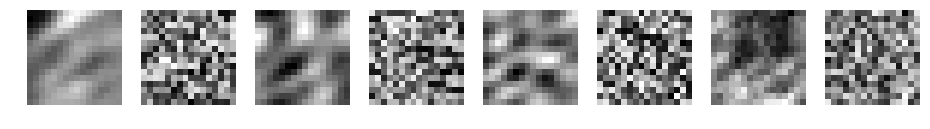

Iter #200, residuals: 47.58


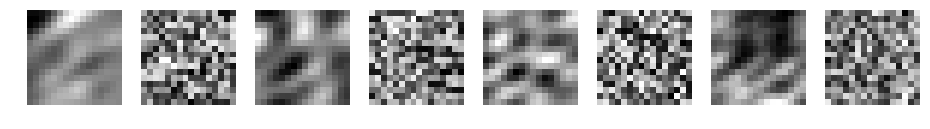

Iter #300, residuals: 47.79


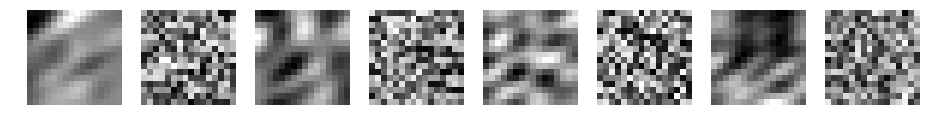

Iter #400, residuals: 47.19


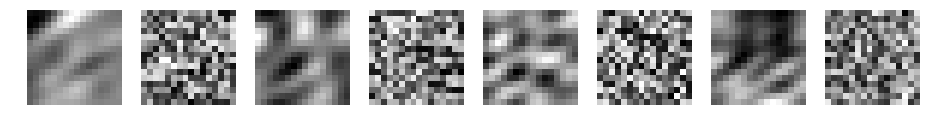

Iter #500, residuals: 50.34


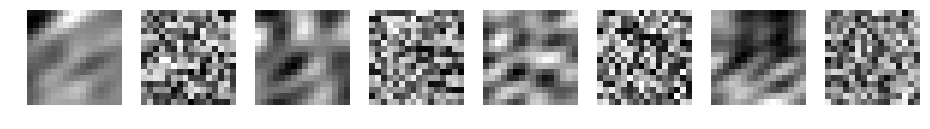

Iter #600, residuals: 47.55


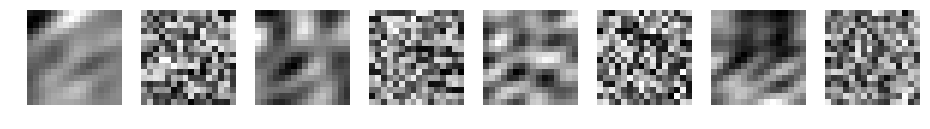

Iter #700, residuals: 46.68


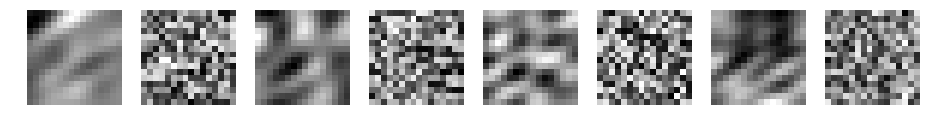

Iter #800, residuals: 46.98


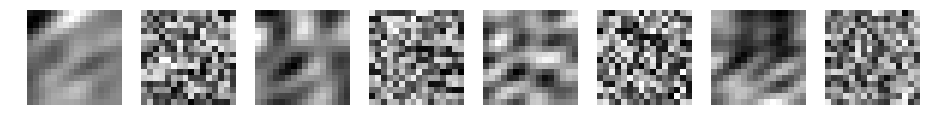

Iter #900, residuals: 47.46


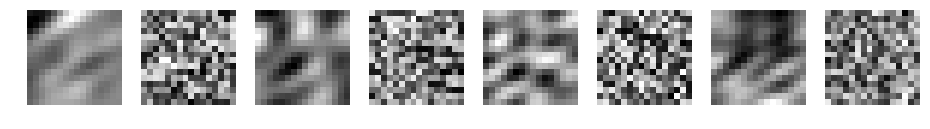

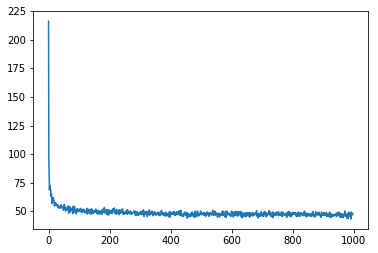

In [40]:
import math
num = 128
width = 16
n = width ** 2
# size of codebook (adjustable)
d = 80
# initialize x : n * d (random)
X = (np.random.random((n, d)) - 0.5) * 2
norm_X(X)
#learning rate
eta = 3
max_iter = 1000
res_list = []
for i in range(1, max_iter):
    patches = sample_random_square_patches(images[:,:,0], num, width)
    clf.fit(X, patches)
    beta = clf.coef_.T
    res = update_X(patches, X, clf.coef_.T, eta)
    res_list.append(res)
    if i % 100 == 0:
        print 'Iter #%d, residuals: %.2f' % (i, res) 
        display_images(X.T, 1, 8)
plt.plot([i for i in range(len(res_list))], res_list)
plt.show()


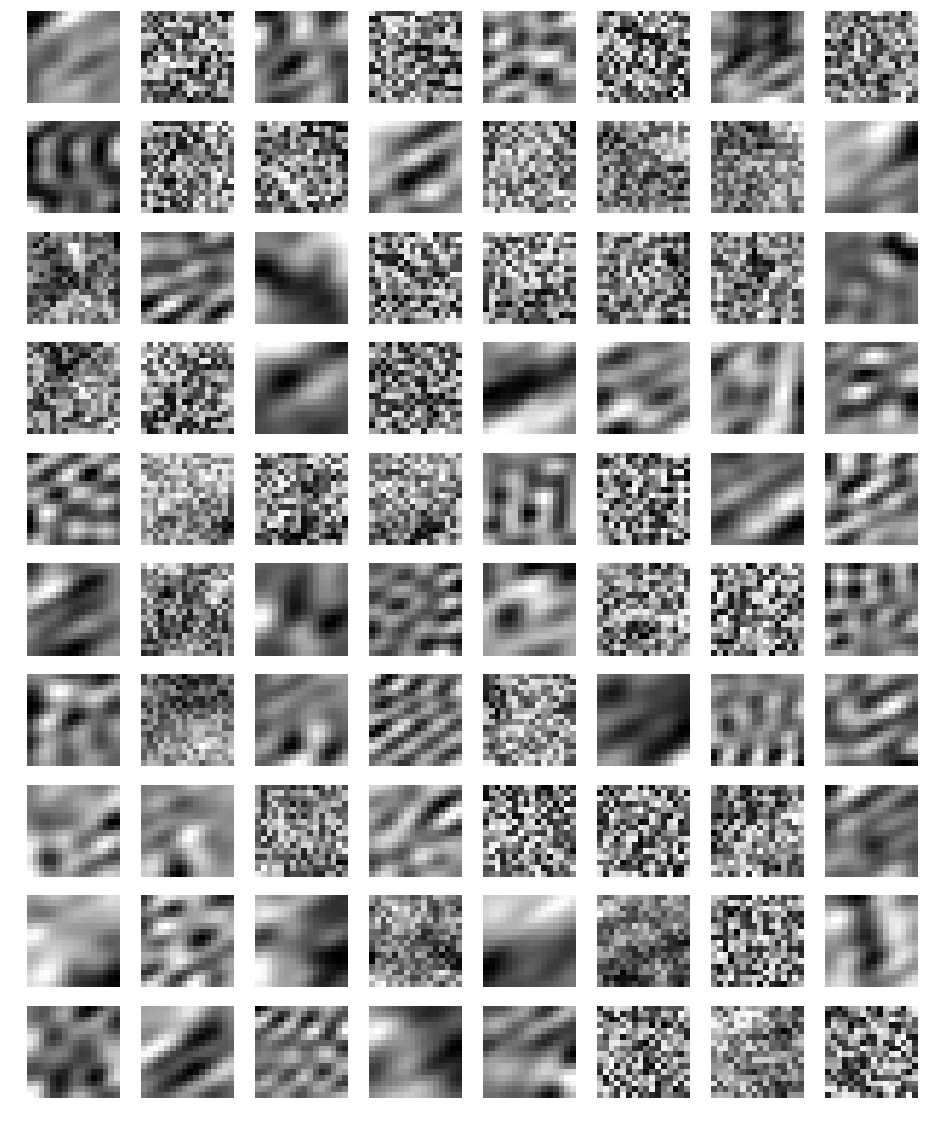

In [41]:
display_images(X.T, 10, 8)

Iter #0, residuals: 222.58


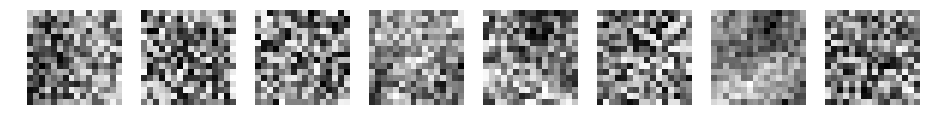

Iter #100, residuals: 63.47


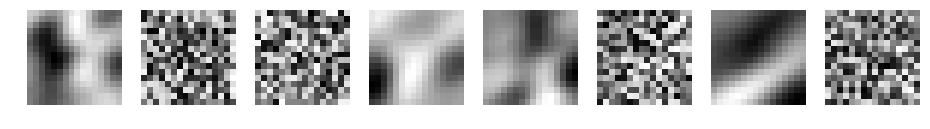

Iter #200, residuals: 58.46


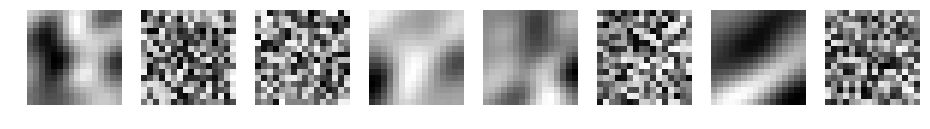

Iter #300, residuals: 59.12


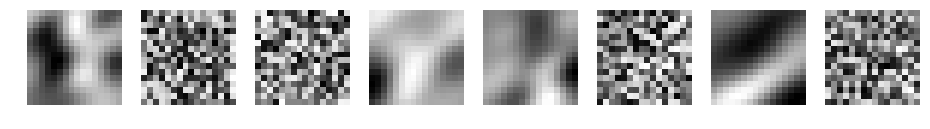

Iter #400, residuals: 60.76


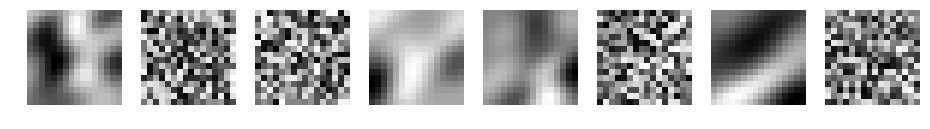

Iter #500, residuals: 58.13


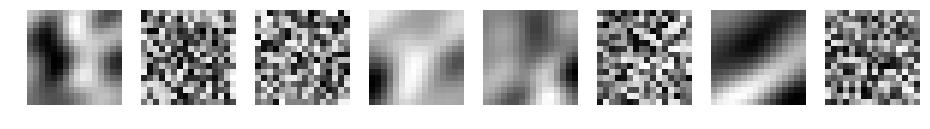

Iter #600, residuals: 58.82


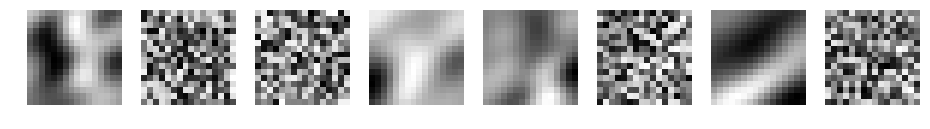

Iter #700, residuals: 58.95


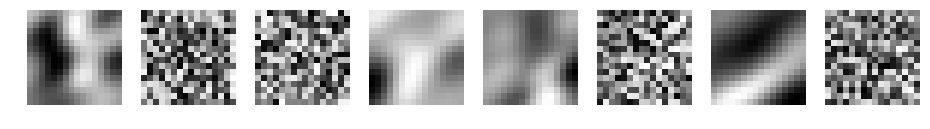

Iter #800, residuals: 57.34


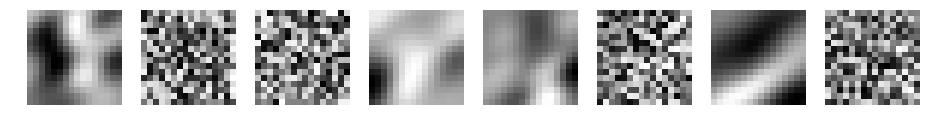

Iter #900, residuals: 57.34


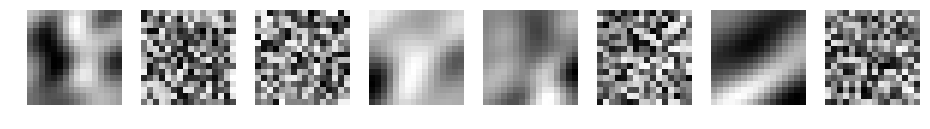

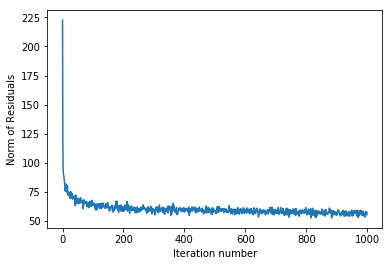

In [12]:
import math
num = 128
width = 16
n = width ** 2
# size of codebook (adjustable)
d = 80
# initialize x : n * d (random)
X = (np.random.random((n, d)) - 0.5) * 2
norm_X(X)
#learning rate
eta = 0.3
max_iter = 1000
res_list = []
for i in range(0, max_iter):
    patches = sample_random_square_patches(images[:,:,0], num, width)
    clf.fit(X, patches)
    beta = clf.coef_.T
    res = update_X(patches, X, clf.coef_.T, eta)
    res_list.append(res)
    if i % 100 == 0:
        print 'Iter #%d, residuals: %.2f' % (i, res) 
        display_images(X.T, 1, 8)
plt.plot([i for i in range(len(res_list))], res_list)
plt.ylabel('Norm of Residuals')
plt.xlabel('Iteration number')
plt.show()

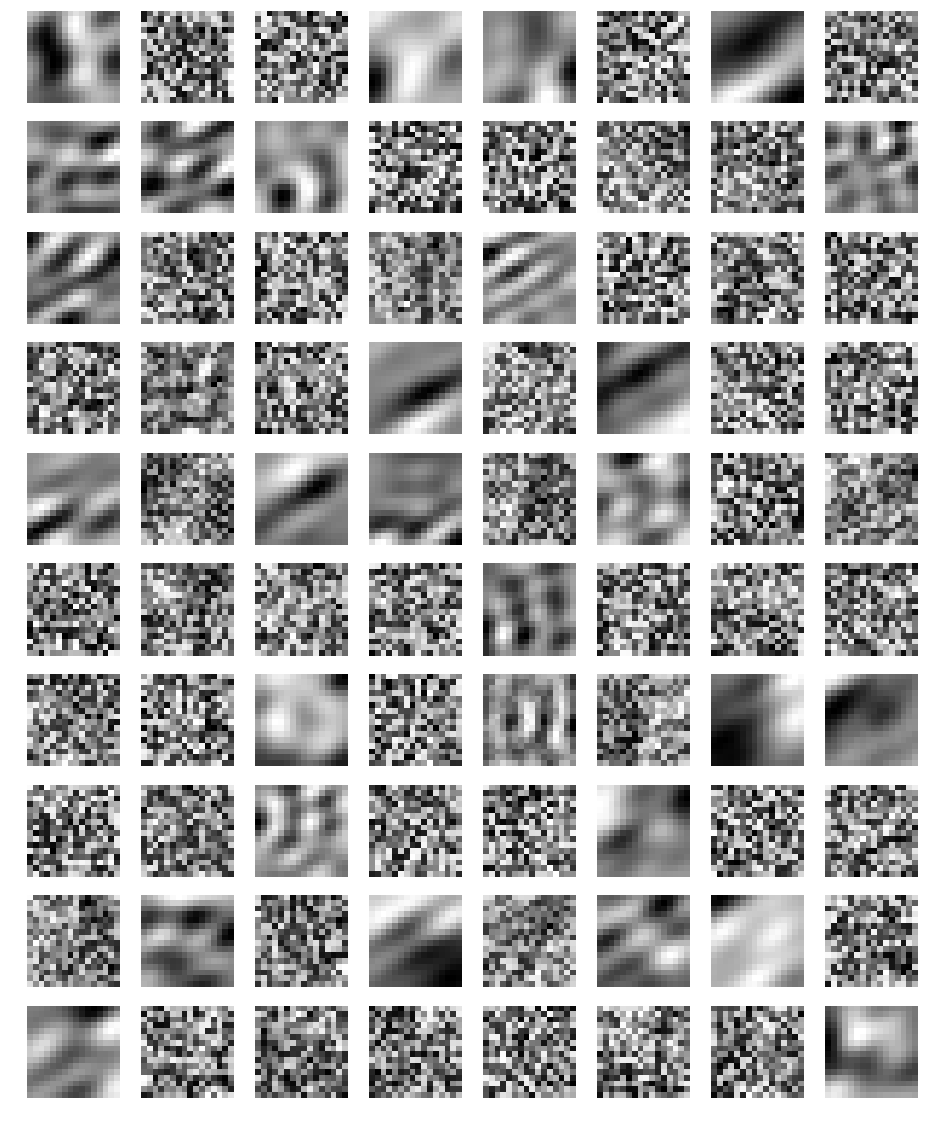

In [13]:
display_images(X.T, 10, 8)

Here, we monitored the convergence of algorithm by looking at the first 8 element of codebook and the normal of residual array as a function of iteration number with two different learning rate 3 and 0.3. From the first 8 element of codebook, it takes around 200 steps for both learning rates to converge. Initially, the codebook elements are noisy, as we initialize the X randomly. As we relax the system, the elements in the code book start to converge and ends up with some edges or specific patterns. 

(256, 1024)


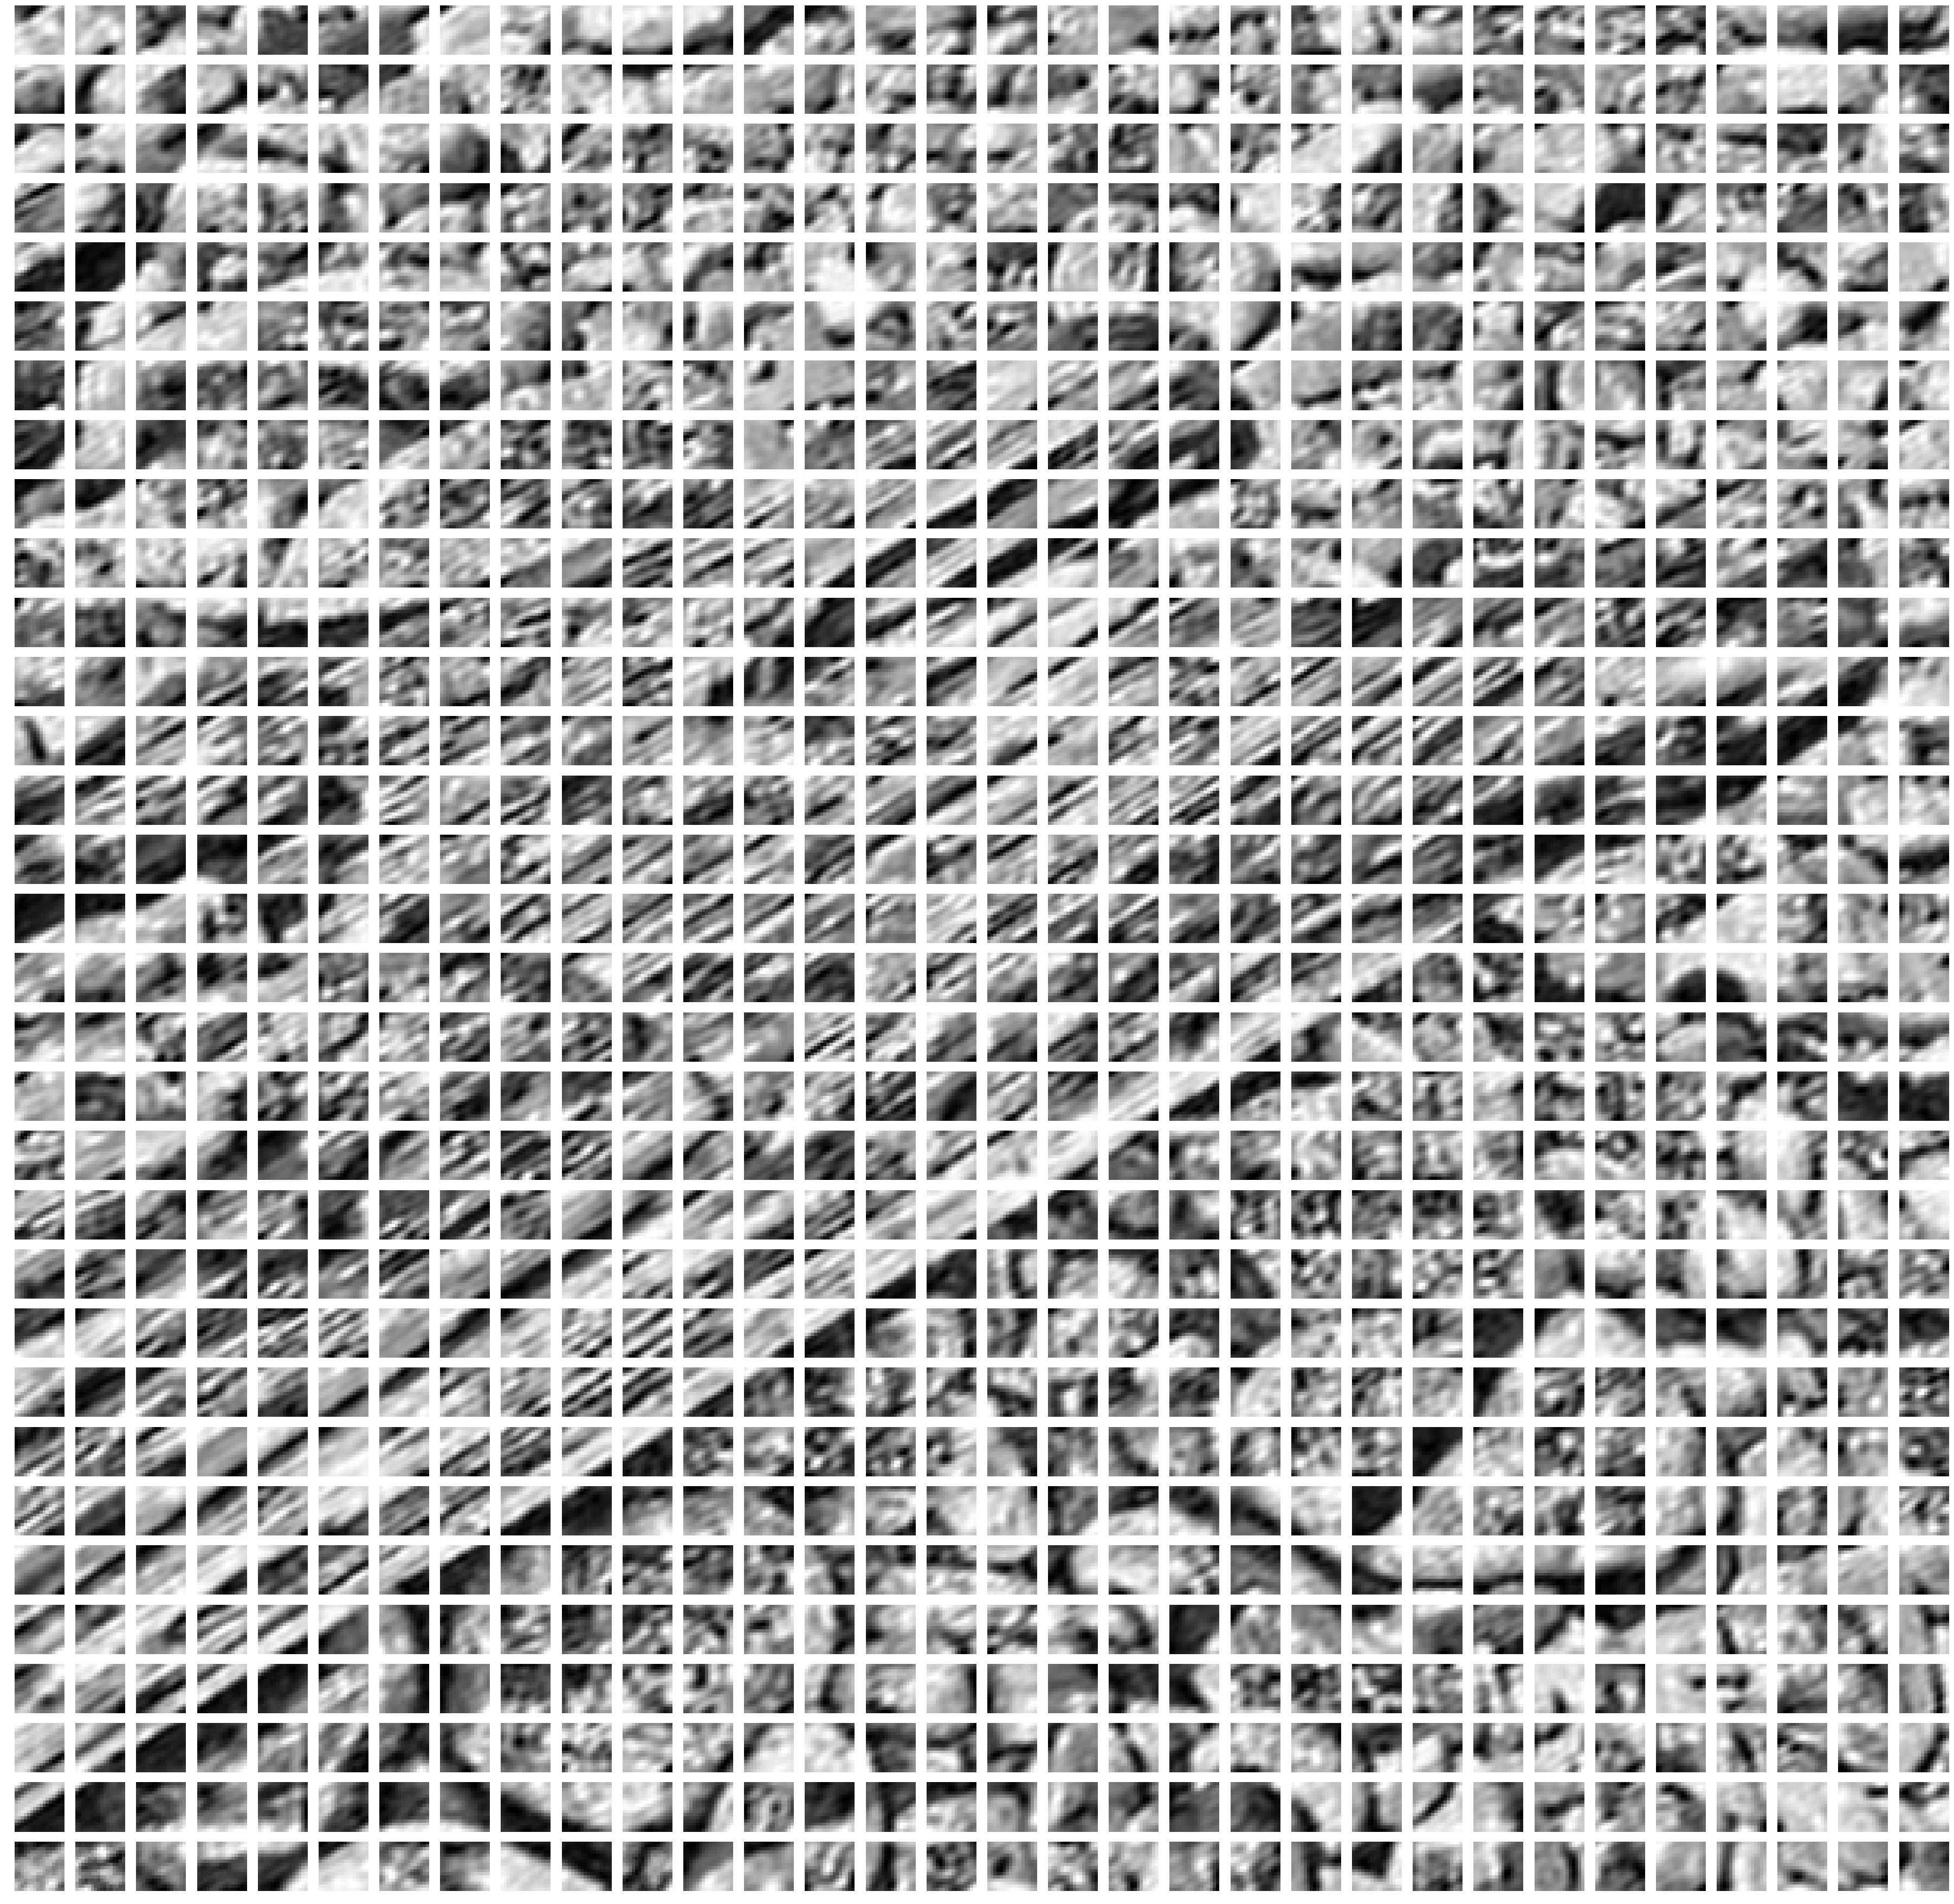

In [45]:
def divide_patches(image, width):
    #num is the number of patches we sample
    #width is the size of pathces we sample
    row, col = image.shape
    nrow = row / width
    ncol = col / width
    patches = np.zeros([width * width, nrow * ncol])
    k = 0
    for i in range(0, row, width):
        for j in range(0, col, width):
            patches[:,k] = np.ravel(image[i: i + width,j:j + width])
            k += 1
    return patches

patches = divide_patches(images[:,:,0], width)
print patches.shape
clf = linear_model.Lasso(alpha=0.007, copy_X=True, fit_intercept=False, max_iter=1500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=True)
clf.fit(X, patches)
y_hat = X.dot(clf.coef_.T)
display_images(y_hat.T, 32, 32)

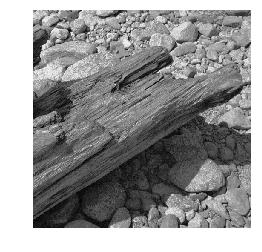

In [14]:
plt.imshow(images[:,:,0], cmap='gray')
plt.axis('off')
plt.show()

Here, we reconstructed the image using of code book, from which we could clearly see the log and pebbles.

# Sparse coding of MNIST

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("mnist").getOrCreate()
df = spark.read.json('/project/cmsc25025/mnist/data.json')
print type(df)
print df.count()
df.show()

<class 'pyspark.sql.dataframe.DataFrame'>
70000
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0, 0.0, 0.0, 0...|    5|
|[0.0, 0.0, 0.0, 0...|    0|
|[0.0, 0.0, 0.0, 0...|    4|
|[0.0, 0.0, 0.0, 0...|    1|
|[0.0, 0.0, 0.0, 0...|    9|
|[0.0, 0.0, 0.0, 0...|    2|
|[0.0, 0.0, 0.0, 0...|    1|
|[0.0, 0.0, 0.0, 0...|    3|
|[0.0, 0.0, 0.0, 0...|    1|
|[0.0, 0.0, 0.0, 0...|    4|
|[0.0, 0.0, 0.0, 0...|    3|
|[0.0, 0.0, 0.0, 0...|    5|
|[0.0, 0.0, 0.0, 0...|    3|
|[0.0, 0.0, 0.0, 0...|    6|
|[0.0, 0.0, 0.0, 0...|    1|
|[0.0, 0.0, 0.0, 0...|    7|
|[0.0, 0.0, 0.0, 0...|    2|
|[0.0, 0.0, 0.0, 0...|    8|
|[0.0, 0.0, 0.0, 0...|    6|
|[0.0, 0.0, 0.0, 0...|    9|
+--------------------+-----+
only showing top 20 rows



In [2]:
import numpy as np
batch = np.array(df.rdd.map(lambda x: x['features']).take(20000)).T
n, N = batch.shape
print n, N

784 20000


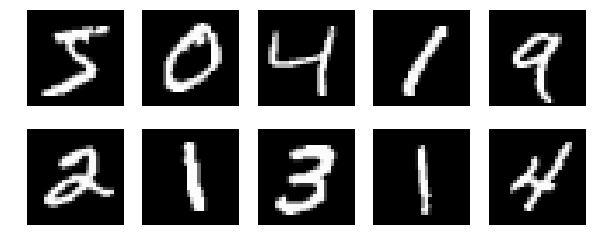

In [5]:
import numpy as np
from __future__ import division
# display the images
%matplotlib inline 
import matplotlib.pyplot as plt
def plot_digit(nrows, ncols, subset):
    #plot digit in nrows and ncols
    plt.figure(figsize = (ncols*2, nrows*2))
    for i in xrange(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(subset[i].reshape((28,28)), cmap='gray')
        plt.axis('off')
    plt.show()
plot_digit(2,5, batch.T)

In [3]:
from sklearn import linear_model
def norm_X(X):
    nrow, ncol = X.shape
    for j in range(ncol):
        X[:, j] /= np.linalg.norm(X[:, j])

clf = linear_model.Lasso(alpha=0.0006, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=True)
d = 30
N = 50
X_mnist = (np.random.random((n, d)) - 0.5) * 2
norm_X(X_mnist)
clf.fit(X_mnist, batch[:,:N])  
print clf.coef_.shape
print np.count_nonzero(clf.coef_)/float(clf.coef_.size)


(50, 30)
0.164666666667


Iter #0, residuals: 62.62


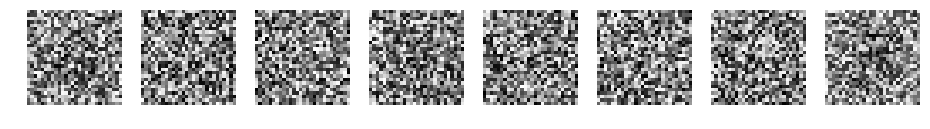

Iter #40, residuals: 39.58


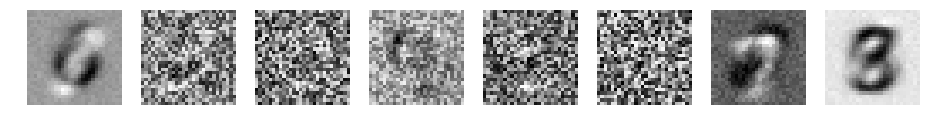

Iter #80, residuals: 36.82


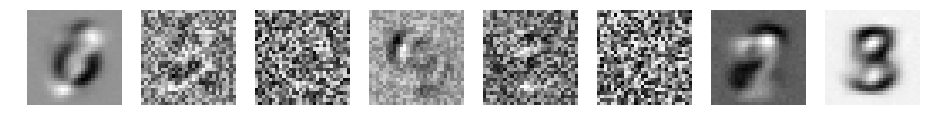

Iter #120, residuals: 35.28


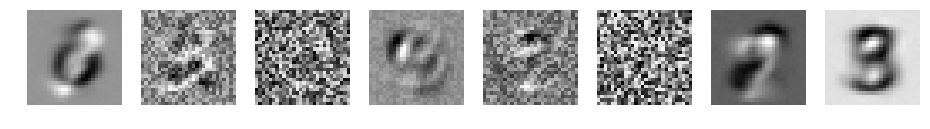

Iter #160, residuals: 36.92


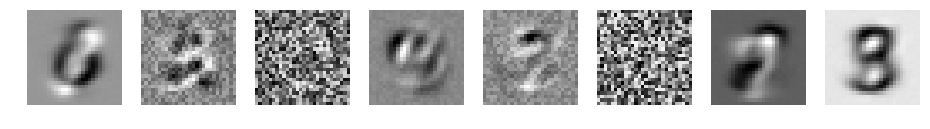

Iter #200, residuals: 34.08


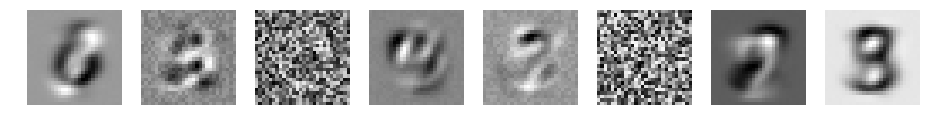

Iter #240, residuals: 32.35


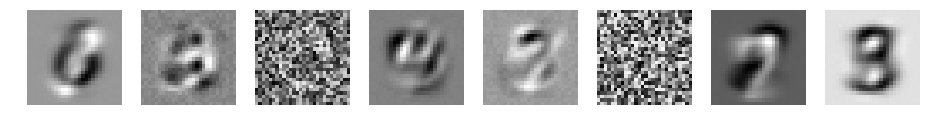

Iter #280, residuals: 34.08


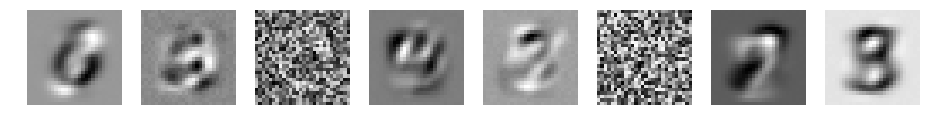

Iter #320, residuals: 32.21


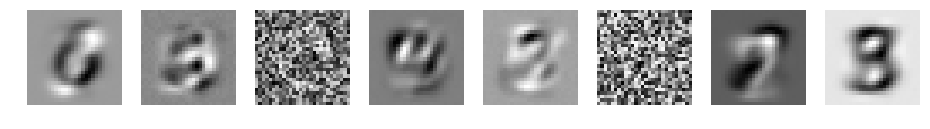

Iter #360, residuals: 31.83


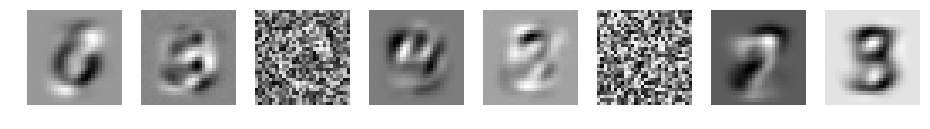

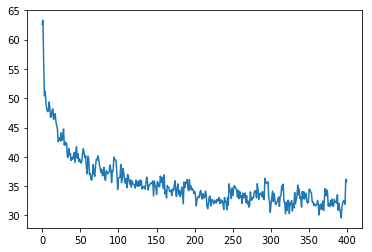

In [6]:
def update_X(patches, X, beta, eta):
    res = patches - X.dot(beta)
    grad = res.dot(beta.T)/n
    X += eta * grad
    return np.linalg.norm(res)

eta = 1
max_iter = 400
res_list = []
for i in range(max_iter):
    y = batch[:, i * N: i * N + N]
    clf.fit(X_mnist, y)
    res = update_X(y, X_mnist, clf.coef_.T, eta)
    res_list.append(res)
    #print res
    if i % 40 == 0:
        print 'Iter #%d, residuals: %.2f' % (i, res) 
        plot_digit(1, 8, X_mnist.T)
plt.plot([i for i in range(len(res_list))], res_list)
plt.show()

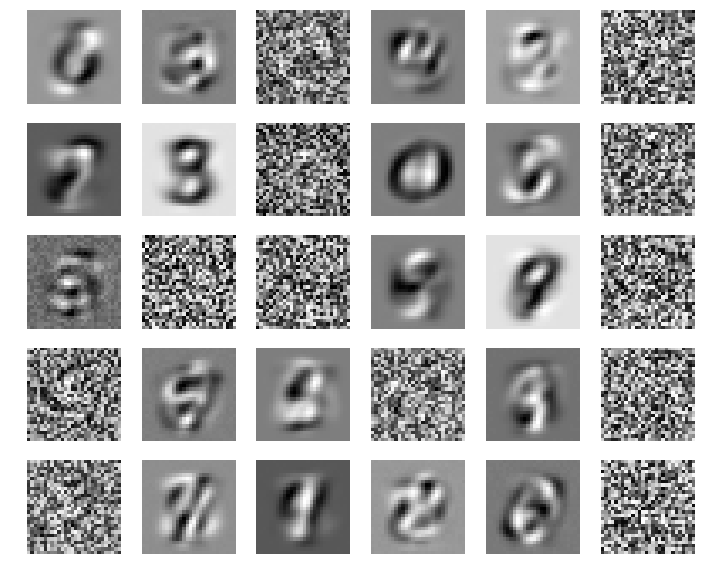

In [7]:
plot_digit(5, 6, X_mnist.T)

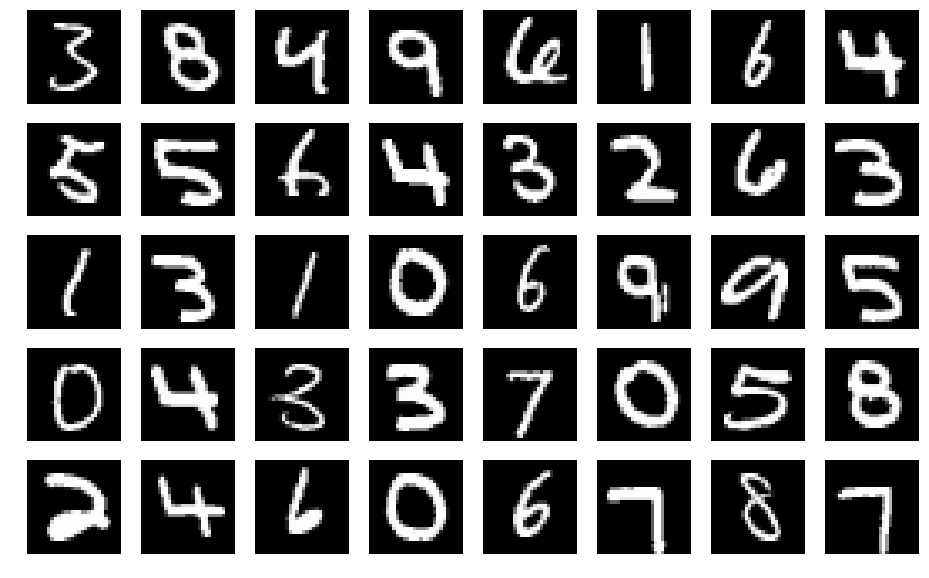

In [8]:
plot_digit(5, 8, y.T)

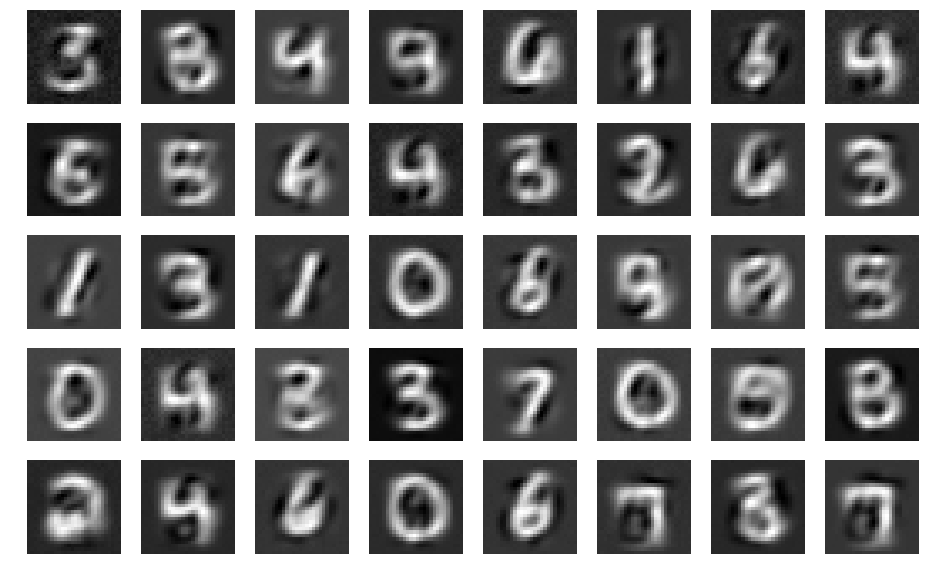

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 40506)
----------------------------------------


Traceback (most recent call last):
  File "/software/python-2.7.12-el7-x86_64/lib/python2.7/SocketServer.py", line 290, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/software/python-2.7.12-el7-x86_64/lib/python2.7/SocketServer.py", line 318, in process_request
    self.finish_request(request, client_address)
  File "/software/python-2.7.12-el7-x86_64/lib/python2.7/SocketServer.py", line 331, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/software/python-2.7.12-el7-x86_64/lib/python2.7/SocketServer.py", line 652, in __init__
    self.handle()
  File "/software/spark-2.1-el7-x86_64/python/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/software/spark-2.1-el7-x86_64/python/pyspark/serializers.py", line 557, in read_int
    raise EOFError
EOFError


In [9]:
y_hat = X_mnist.dot(clf.coef_.T)
plot_digit(5, 8, y_hat.T)

## Comment:

Although the images reconstruced from Sparse coding are not prefectly clear, which can be improved by optimizing of the parameters, they can accuratly represent the original digits.

The codewords we get from Sparse coding are an over-complete set of basis vectors to represent input data (also set of vectors.). Compared 
to the main eigenvectors in PCA, which represent as much as variance of the input data, these codewords are better able to capture stuctures and patterns inherent from input data, i.e., MNIST digits in this case.

